### Table of content:
1. [Imports](#1.-Imports)  
2. [Load the dataset](#2.-Load-the-dataset)  
3. [Plotting images](#3.-Plotting-images)   
    3.1. [Plotting using image paths](#3.1-Plotting-using-image-paths)  
    3.2. [Plotting using PIL.Image objects](#3.2-Plotting-images-using-PIL.Image-objects)  
    3.3. [Plotting using numpy.ndarray objects](#3.3-Plotting-using-numpy.ndarray-objects)  

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import sys
sys.path.append('../')
import ipyplot

In [ ]:
try:
    import ipyplot
except:
    import sys
#     sys.path.append('../')
    ! {sys.executable} -m pip install git+https://github.com/karolzak/ipyplot
    import ipyplot

In [3]:
import glob
import os
import numpy as np
import pandas as pd
from numpy import random
from PIL import Image
import urllib.request
import zipfile

## 2. Load the dataset
[[back to the top](#Table-of-content:)]

In [4]:
datasets_dir = '../datasets/'
zip_filename = 'gear_images.zip'

In [ ]:
print('Downloading the data into `datasets` folder..')
url = 'https://privdatastorage.blob.core.windows.net/github/ipyplot/gear_images.zip'
urllib.request.urlretrieve(url, datasets_dir + zip_filename)
print("Done!")

In [ ]:
with zipfile.ZipFile(datasets_dir + zip_filename, 'r') as zip_ref:
    os.makedirs(datasets_dir, exist_ok=True)
    zip_ref.extractall(datasets_dir)

In [5]:
images = glob.glob(datasets_dir + 'gear_images' + '/**/*.*')
images = [image.replace('\\', '/') for image in images]
images = np.asarray(images, dtype=str) # conversion to nummpy is pretty important here

In [6]:
labels = [image.split('/')[-2] for image in images]
labels = np.asarray(labels, dtype=str) # conversion to nummpy is pretty important here

## 3. Plotting images
### 3.1 Plotting using image paths
[[back to the top](#Table-of-content:)]

#### Display class representations (first image from each class)


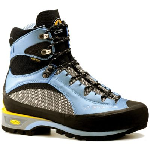
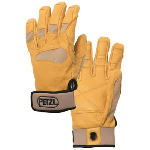

In [7]:
ipyplot.plot_class_representations(images, labels, img_width=150, labels_order=['boots','gloves'], force_b64=True)

#### Display a collection of images 
Displays images based on provided list.  
max_images param limits the number of displayed images (takes top n images only)

In [ ]:
ipyplot.plot_images(images[labels == 'axes'], labels[labels == 'axes'],  max_images=30, img_width=150)

#### Display top N images (max_imgs_per_tab) in separate tab for each class (based on provided labels)


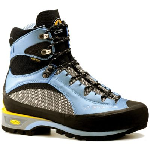
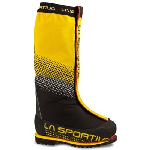
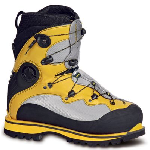
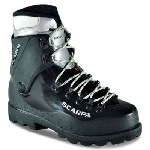
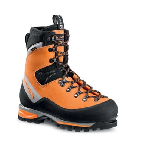
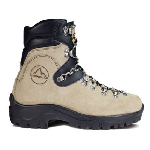
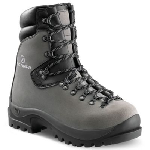
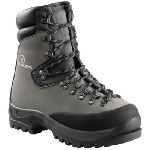
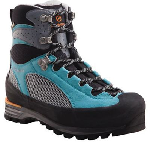
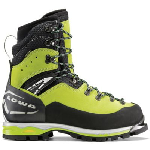
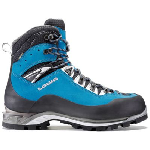
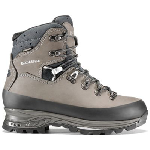
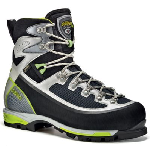
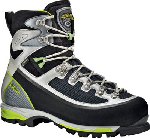
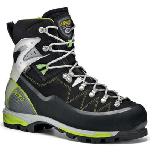
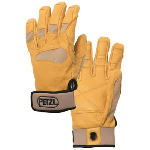
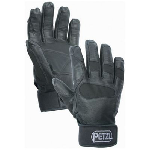
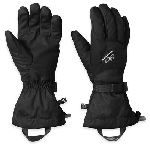
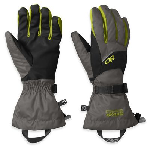
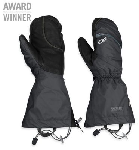
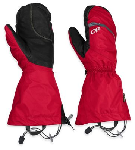
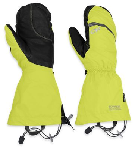
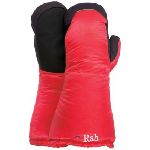
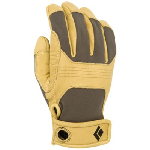
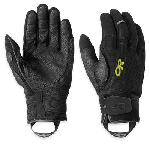
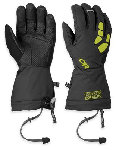
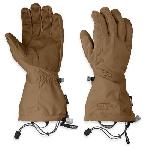
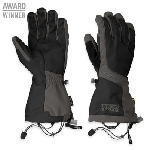
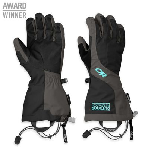
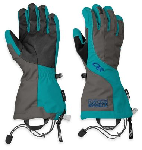

In [8]:
ipyplot.plot_class_tabs(images, labels, labels, max_imgs_per_tab=15, img_width=150, tabs_order=['boots','gloves'], force_b64=True)

### 3.2 Plotting images using PIL.Image objects
[[back to the top](#Table-of-content:)]

In [ ]:
images = [Image.open(image) for image in images]
images = np.asarray(images, dtype=np.object)

#### Display class representations (first image from each class)

In [ ]:
ipyplot.plot_class_representations(images, labels, img_width=150)

#### Display a collection of images 
Displays images based on provided list.  
max_images param limits the number of displayed images (takes top n images only)

In [ ]:
ipyplot.plot_images(images[labels == 'tents'], max_images=20, img_width=150)

#### Display top N images (max_imgs_per_tab) in separate tab for each class (based on provided labels)

In [ ]:
ipyplot.plot_class_tabs(images, labels, max_imgs_per_tab=15, img_width=150)

### 3.3 Plotting using numpy.ndarray objects  
[[back to the top](#Table-of-content:)]

In [ ]:
images = [np.asarray(image) for image in images]
images = np.asarray(images)
images[0].shape

#### Display class representations (first image from each class)

In [ ]:
ipyplot.plot_class_representations(images, labels, img_width=150)

#### Display a collection of images 
Displays images based on provided list.  
max_images param limits the number of displayed images (takes top n images only)

In [ ]:
ipyplot.plot_images(images[labels == 'tents'], max_images=20, img_width=150)

#### Display top N images (max_imgs_per_tab) in separate tab for each class (based on provided labels)

In [ ]:
ipyplot.plot_class_tabs(images, labels, max_imgs_per_tab=15, img_width=150)